### Exemplo Basico

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
class Newton():
    def __init__(self, x, points):
        self.x = x
        self.x_points, self.y_points = zip(*points)
        n = len(points)
        self.table = pd.DataFrame(points, columns=['X', 'F|X0|'])
        for j in range(1, n):
            col_name = 'F|' + ','.join(f'x{i}' for i in range(j+1)) + '|'
            self.table[col_name] = [
                (self.table.iloc[i+1,j] - self.table.iloc[i,j]) / (self.x_points[i+j] - self.x_points[i])
                if i < n - j else None
                for i in range(n)
            ]
        print(self.table)
    def n(self, x):
        result = self.table.iloc[0, 1]
        for j in range(1, len(self.x_points)):
            coeff = self.table.iloc[0, j+1]
            term = 1
            for i in range(j):
                term *= (x - self.x_points[i])     
            result += coeff * term
        return result

    def plot(self):
        x_vals = np.linspace(min(self.x_points)-(max(self.x_points)-min(self.x_points)), max(self.x_points)+(max(self.x_points)-min(self.x_points)), 200)
        y_vals = [self.n(x) for x in x_vals]
        columns = ['X', 'P(X)']
        dados = [(x, self.n(x)) for x in self.x] 
        print(pd.DataFrame(dados, columns=columns))
        plt.scatter(self.x_points, self.y_points, color='red', s=50, zorder=5, label='Pontos')
        plt.scatter(self.x,[self.n(x) for x in self.x],color = 'orange',s=50,zorder=5,label = 'Alvos')
        plt.plot(x_vals,y_vals,color = 'blue',label = 'Newton')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Newton")
        plt.grid(True)
        plt.legend()
        plt.show()   


      X  F|X0|  F|x0,x1|  F|x0,x1,x2|
0  0.36   0.51  1.333333    62.962963
1  0.42   0.59  7.000000          NaN
2  0.45   0.80       NaN          NaN
     X      P(X)
0  0.4  0.512963


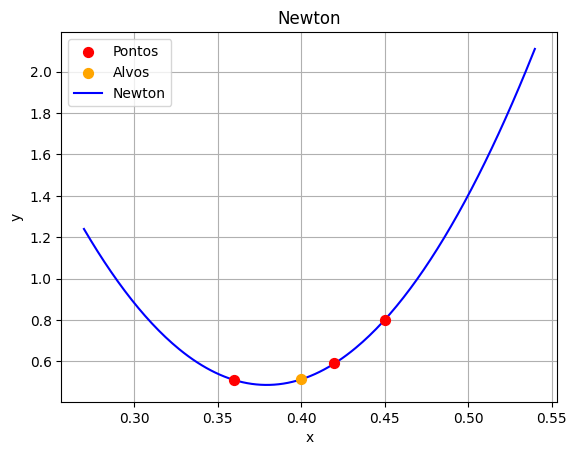

In [10]:
n = Newton([0.40],[
    (0.36,0.51),
    (0.42,0.59),
    (0.45,0.8),
]).plot()
